In [28]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
X = pd.DataFrame(data=iris.data,columns=iris.feature_names)
y = iris.target

In [39]:
from itertools import product
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
from sklearn.metrics import accuracy_score

eps_values = [i/10 for i in range(1, 20, 1)]
min_samples_values = [i for i in range(3, 21, 1)]
metric_values = ['euclidean']
algorithm_values = ['auto', 'ball_tree', 'kd_tree', 'brute']
p_values = [i for i in range(2,6,1)]
split_values = [i/100 for i in range(10,55,5)]

best_model = None
best_score = float('-inf')
best_train_test_ratio = 0.0
best_param_list = []
best_pred_y = 0
best_test_y = 0

for eps,min_samples,metric,algorithm,p,split in product(eps_values,min_samples_values,metric_values,algorithm_values,p_values,split_values):

    train_X, test_X, train_y, test_y = train_test_split(X,y,random_state=None,test_size=split)
    model = DBSCAN(eps=eps,min_samples=min_samples,metric=metric,algorithm=algorithm,p=p)
    model.fit(train_X,train_y)
    pred_y = model.fit_predict(test_X)
    score = accuracy_score(test_y,pred_y)

    if score > best_score:
        best_score = score
        best_train_test_ratio = split
        best_model = model
        best_param_list = [eps,min_samples,metric,algorithm,p,split]
        best_pred_y = pred_y
        best_test_y = test_y



In [40]:
print(best_score)
print(best_param_list)
print(best_train_test_ratio)
print(best_model.components_)

1.0
[0.9, 3, 'euclidean', 'brute', 2, 0.15]
0.15
[[5.  3.3 1.4 0.2]
 [4.6 3.2 1.4 0.2]
 [5.7 2.6 3.5 1. ]
 [5.1 3.7 1.5 0.4]
 [5.5 4.2 1.4 0.2]
 [6.4 3.2 5.3 2.3]
 [6.  3.4 4.5 1.6]
 [6.5 3.2 5.1 2. ]
 [5.  3.2 1.2 0.2]
 [5.4 3.4 1.5 0.4]
 [6.4 2.9 4.3 1.3]
 [5.7 3.8 1.7 0.3]
 [5.7 3.  4.2 1.2]
 [5.1 3.4 1.5 0.2]
 [5.1 3.5 1.4 0.3]
 [4.9 3.  1.4 0.2]
 [4.8 3.  1.4 0.1]
 [5.1 3.3 1.7 0.5]
 [5.1 3.8 1.6 0.2]
 [6.5 3.  5.5 1.8]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23

Confusion Matrix: 

[[13  0  0]
 [ 0  5  0]
 [ 0  0  5]]




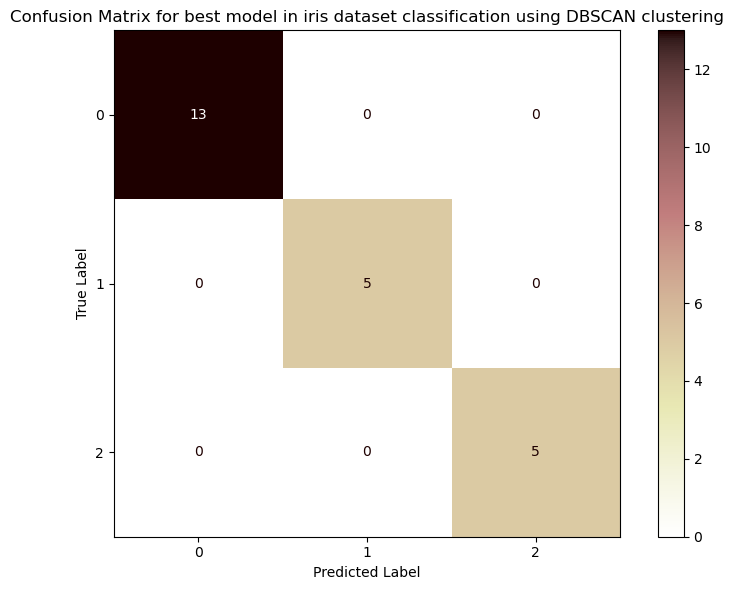

In [41]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

cm = confusion_matrix(best_test_y, best_pred_y)
print(classification_report(best_test_y,best_pred_y))
print("Confusion Matrix: \n")
print(cm)
print("\n")

fig, ax = plt.subplots(figsize=(8, 6))
cm_display = (ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2]))
cm_display.plot(ax=ax, cmap='pink_r', values_format='d')
  # Add a title and labels
ax.set_title('Confusion Matrix for best model in iris dataset classification using DBSCAN clustering')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

plt.tight_layout()
  # Show the Confusion Matrix
plt.show()

In [42]:
from sklearn import metrics

rand_index = metrics.rand_score(best_test_y, best_pred_y)
adjusted_rand_index = metrics.adjusted_rand_score(best_test_y, best_pred_y)

# Mutual Information and Adjusted Mutual Information
mutual_info = metrics.mutual_info_score(best_test_y, best_pred_y)
adjusted_mutual_info = metrics.adjusted_mutual_info_score(best_test_y, best_pred_y)
normalized_mutual_info = metrics.normalized_mutual_info_score(best_test_y, best_pred_y)

# Silhouette Coefficient, Calinski-Harabasz Index, and Davies-Bouldin Index
silhouette_coefficient = metrics.silhouette_score(X, y)
calinski_harabasz_index = metrics.calinski_harabasz_score(X, y)
davies_bouldin_index = metrics.davies_bouldin_score(X, y)

print("Rand Index:", rand_index)
print("Adjusted Rand Index:", adjusted_rand_index)
print("Mutual Information:", mutual_info)
print("Adjusted Mutual Information:", adjusted_mutual_info)
print("Normalized Mutual Information:", normalized_mutual_info)
print("Silhouette Coefficient:", silhouette_coefficient)
print("Calinski-Harabasz Index:", calinski_harabasz_index)
print("Davies-Bouldin Index:", davies_bouldin_index)

Rand Index: 1.0
Adjusted Rand Index: 1.0
Mutual Information: 0.985984617175194
Adjusted Mutual Information: 1.0
Normalized Mutual Information: 1.0
Silhouette Coefficient: 0.5034774406932961
Calinski-Harabasz Index: 487.33087637489984
Davies-Bouldin Index: 0.7513707094756737
